<a href="https://colab.research.google.com/github/Suhit97/Image-Captioning/blob/master/Train_bus_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.0MB/s 


In [7]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import graphviz 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
train = pd.read_excel('/content/gdrive/MyDrive/Gearge.xlsx',dtype={'Gender': str, 'Car_ownership': int, 'Travel': str, 'Income_level': str,'Transport': str})

In [9]:
train.head(10)

,Gender,Car_ownership,Travel,Income_Level,Transport
0,Male,0,cheap,low,bus
1,Male,1,cheap,medium,bus
2,Female,1,cheap,medium,train
3,Female,0,cheap,low,bus
4,Male,1,cheap,medium,bus
5,Male,0,standard,medium,train
6,Female,1,standard,medium,train
7,Female,1,expensive,high,car
8,Male,2,expensive,medium,car
9,Female,2,expensive,high,car


In [10]:
train.dtypes

Gender           object
Car_ownership     int64
Travel           object
Income_Level     object
Transport        object
dtype: object

In [11]:
encoder = ce.OrdinalEncoder(cols=['Gender', 'Car_ownership', 'Travel', 'Income_Level', 'Transport'])

X_train = encoder.fit_transform(train)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [12]:
X_train.head(10)

,Gender,Car_ownership,Travel,Income_Level,Transport
0,1,1,1,1,1
1,1,2,1,2,1
2,2,2,1,2,2
3,2,1,1,1,1
4,1,2,1,2,1
5,1,1,2,2,2
6,2,2,2,2,2
7,2,2,3,3,3
8,1,3,3,2,3
9,2,3,3,3,3


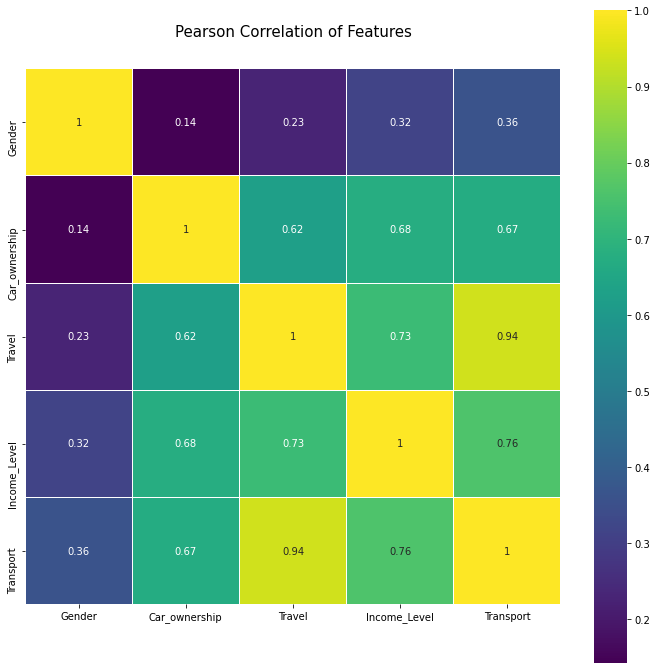

In [13]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [14]:
X = X_train.drop(['Transport'], axis=1)

y = X_train['Transport']

## Decision Tree for depth 3

In [15]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
decision_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

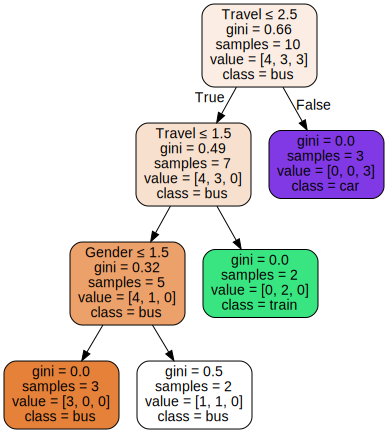

In [16]:
 
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                               feature_names=['Gender', 'Car_ownership', 'Travel', 'Income_Level'],
                               class_names=['bus','train', 'car'],filled=True,
                                rounded=True,  
                              special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("Gini")
graph

## Changing Depth to 5

In [17]:
decision_tree1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
decision_tree1.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

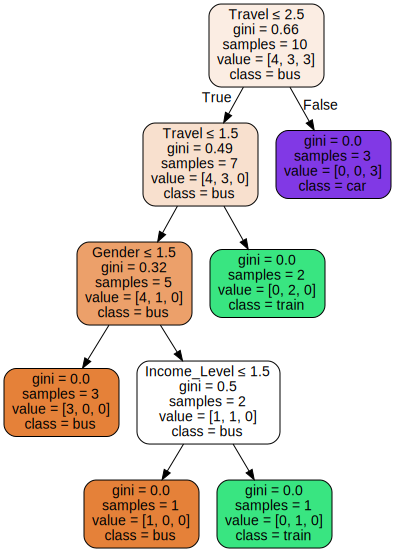

In [18]:
dot_data = tree.export_graphviz(decision_tree1, out_file=None,
                               feature_names=['Gender', 'Car_ownership', 'Travel', 'Income_Level'],
                               class_names=['bus','train', 'car'],filled=True,
                                rounded=True,  
                              special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("Gini")
graph